In [1]:
import os
import nltk
import pandas as pd
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /home/monty/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/monty/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/monty/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/monty/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
import os
from paragraph_cleaner import ParagraphCleaner
from paragraph_analysis import ParagraphAnalysis
from utils import big_data_dict, styled_print, extract_images, extract_paragraphs, \
    random_select_dict, combine_multiple_text_files


In [4]:
%load_ext autoreload
%autoreload 2

First, let's get each chapter file

In [ ]:
dir_path = 'data/processed-data/context-data/'
filenames = []

for filename in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, filename)):
        filenames.append(filename)

print(filenames)

In [9]:
def get_paragraphs(paragraph_file_path):
    with open(paragraph_file_path) as file:
        lines = []
        for line in file:
            lines.append(line.strip())
    return lines
print(os.getcwd())
corpus = get_paragraphs("../data/processed-data/generated-chapters/davinci:ft-personal:test-fire-and-blood/03-Three Heads Had the Dragon Governance Under King Aegon I.txt")
ddf = {i:val for i, val in enumerate(corpus)}
print(ddf)

/home/monty/RyersonGraduateStudies/CP8207/Final Project/fire-and-blood-story-generation/src
{0: 'Aegon I Targaryen was one of the greatest Targaryens to ever reign. With his fire and steel, he forged a renown for himself that extended far beyond Westeros and into the most distant corners of the world. His loyal subjects could see him in their dreams; his enemies trembled at the sound of his name in terror. To commemorate this, Aegon constructed the Iron Throne with a thousand swords cooled by dragonfire - a significant symbol recognized as one of his greatest accomplishments during his rule.', 1: 'Aegon I Targaryen made great efforts to promote the reconciliation of the Seven Kingdoms to Targaryen rule, which were encouraged by his loyal subjects across Westeros. Those who witnessed Aegon\'s cunning and courage first-hand served him ururedly as he forged a realm greater than any other before or since. Even as former enemies like House Lannister\'s eldest son, Loren Lannister\'s heir Lo

In [10]:
paragraph_cleaner = ParagraphCleaner(ddf)

In [11]:
cleaned_paragraphs = paragraph_cleaner.clean_paragraphs()
styled_print(f"Found Total {len(cleaned_paragraphs)} Paragraphs from the", header=True)

› Found Total 31 Paragraphs from the


In [12]:
cleaned_paragraphs

{0: 'aegon i targaryen was one of the greatest targaryens to ever reign. with his fire and steel  he forged a renown for himself that extended far beyond westeros and into the most distant corners of the world. his loyal subjects could see him in their dreams  his enemies trembled at the sound of his name in terror. to commemorate this  aegon constructed the iron throne with a thousand swords cooled by dragonfire   a significant symbol recognized as one of his greatest accomplishments during his rule.',
 1: 'aegon i targaryen made great efforts to promote the reconciliation of the seven kingdoms to targaryen rule  which were encouraged by his loyal subjects across westeros. those who witnessed aegon s cunning and courage first hand served him ururedly as he forged a realm greater than any other before or since. even as former enemies like house lannister s eldest son  loren lannister s heir loren  bowed down in reverence  nobles likeevenstarof tarth king jaehaerys alton celtigar and ar

In [13]:
paragraph_analysis = ParagraphAnalysis(
    ddf, 
    out_dir="./dummy"
)
styled_print(f"Found {paragraph_analysis.words_counts} Words.", header=True)

› Found 4397 Words.


In [14]:
paragraph_analysis.paragraphs_df.head()

,id,paragraphs,sentences,words,paragraph_chars_count,paragraph_words_count,paragraph_avg_word_len
0,0,Aegon I Targaryen was one of the greatest Targ...,[Aegon I Targaryen was one of the greatest Tar...,"[Aegon, I, Targaryen, was, one, of, the, great...",501,93,4.473118
1,1,Aegon I Targaryen made great efforts to promot...,[Aegon I Targaryen made great efforts to promo...,"[Aegon, I, Targaryen, made, great, efforts, to...",883,156,4.769231
2,2,Visenya and her queenly sisters took a special...,[Visenya and her queenly sisters took a specia...,"[Visenya, and, her, queenly, sisters, took, a,...",933,162,4.845679
3,3,"Aegon Targaryen, Visenya and Rhaenys were dete...","[Aegon Targaryen, Visenya and Rhaenys were det...","[Aegon, Targaryen, ,, Visenya, and, Rhaenys, w...",872,152,4.828947
4,4,"Aegon's designated seat of power, Aegonfort at...","[Aegon's designated seat of power, Aegonfort a...","[Aegon, 's, designated, seat, of, power, ,, Ae...",738,133,4.654135


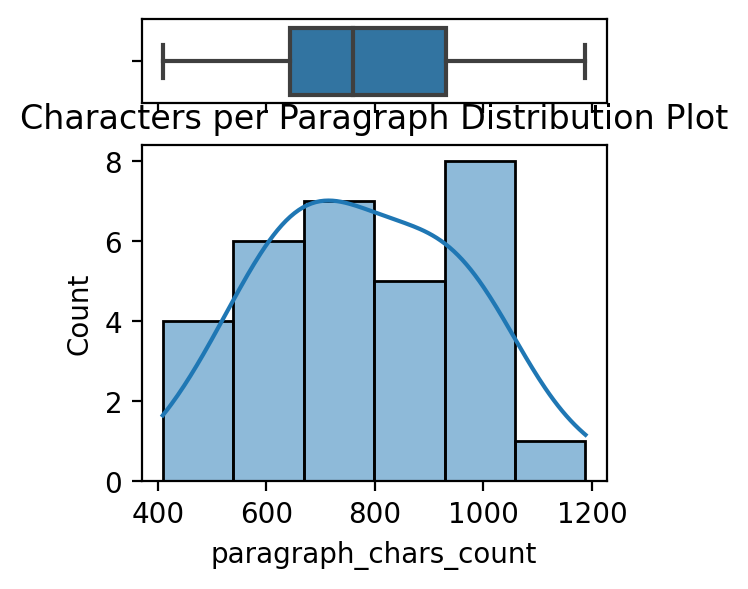

In [15]:
paragraph_analysis.characters_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

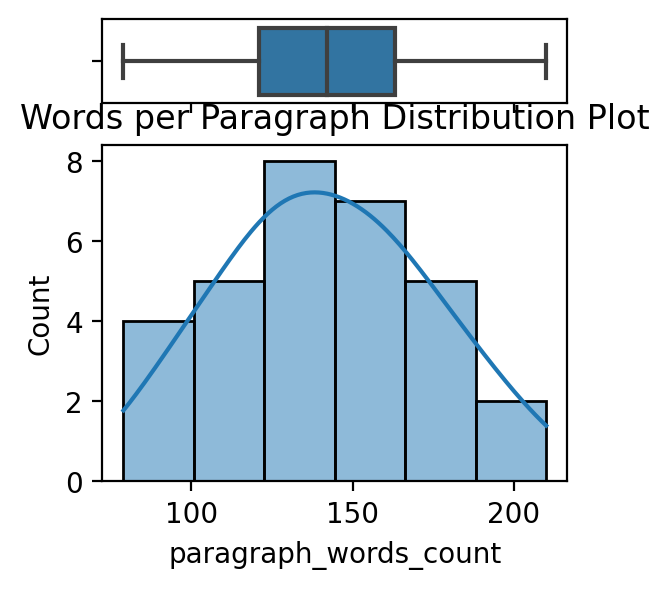

In [16]:
paragraph_analysis.words_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

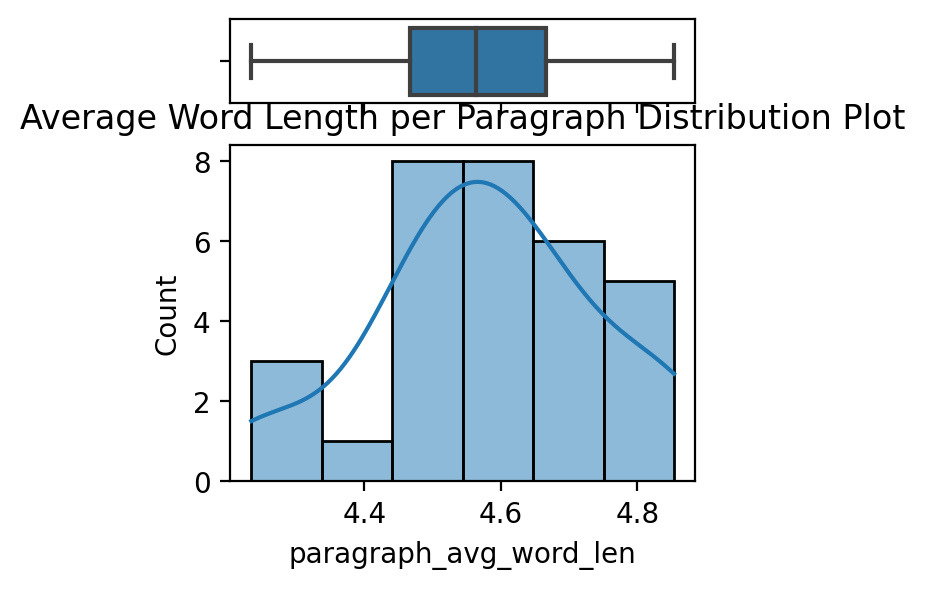

In [17]:
paragraph_analysis.avg_word_len_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

In [18]:
stop_words_corpus = paragraph_analysis.get_stop_words_corpus(language='english')
styled_print(f"Found {len(stop_words_corpus.keys())} unique stop words", header=True)

› Found 97 unique stop words


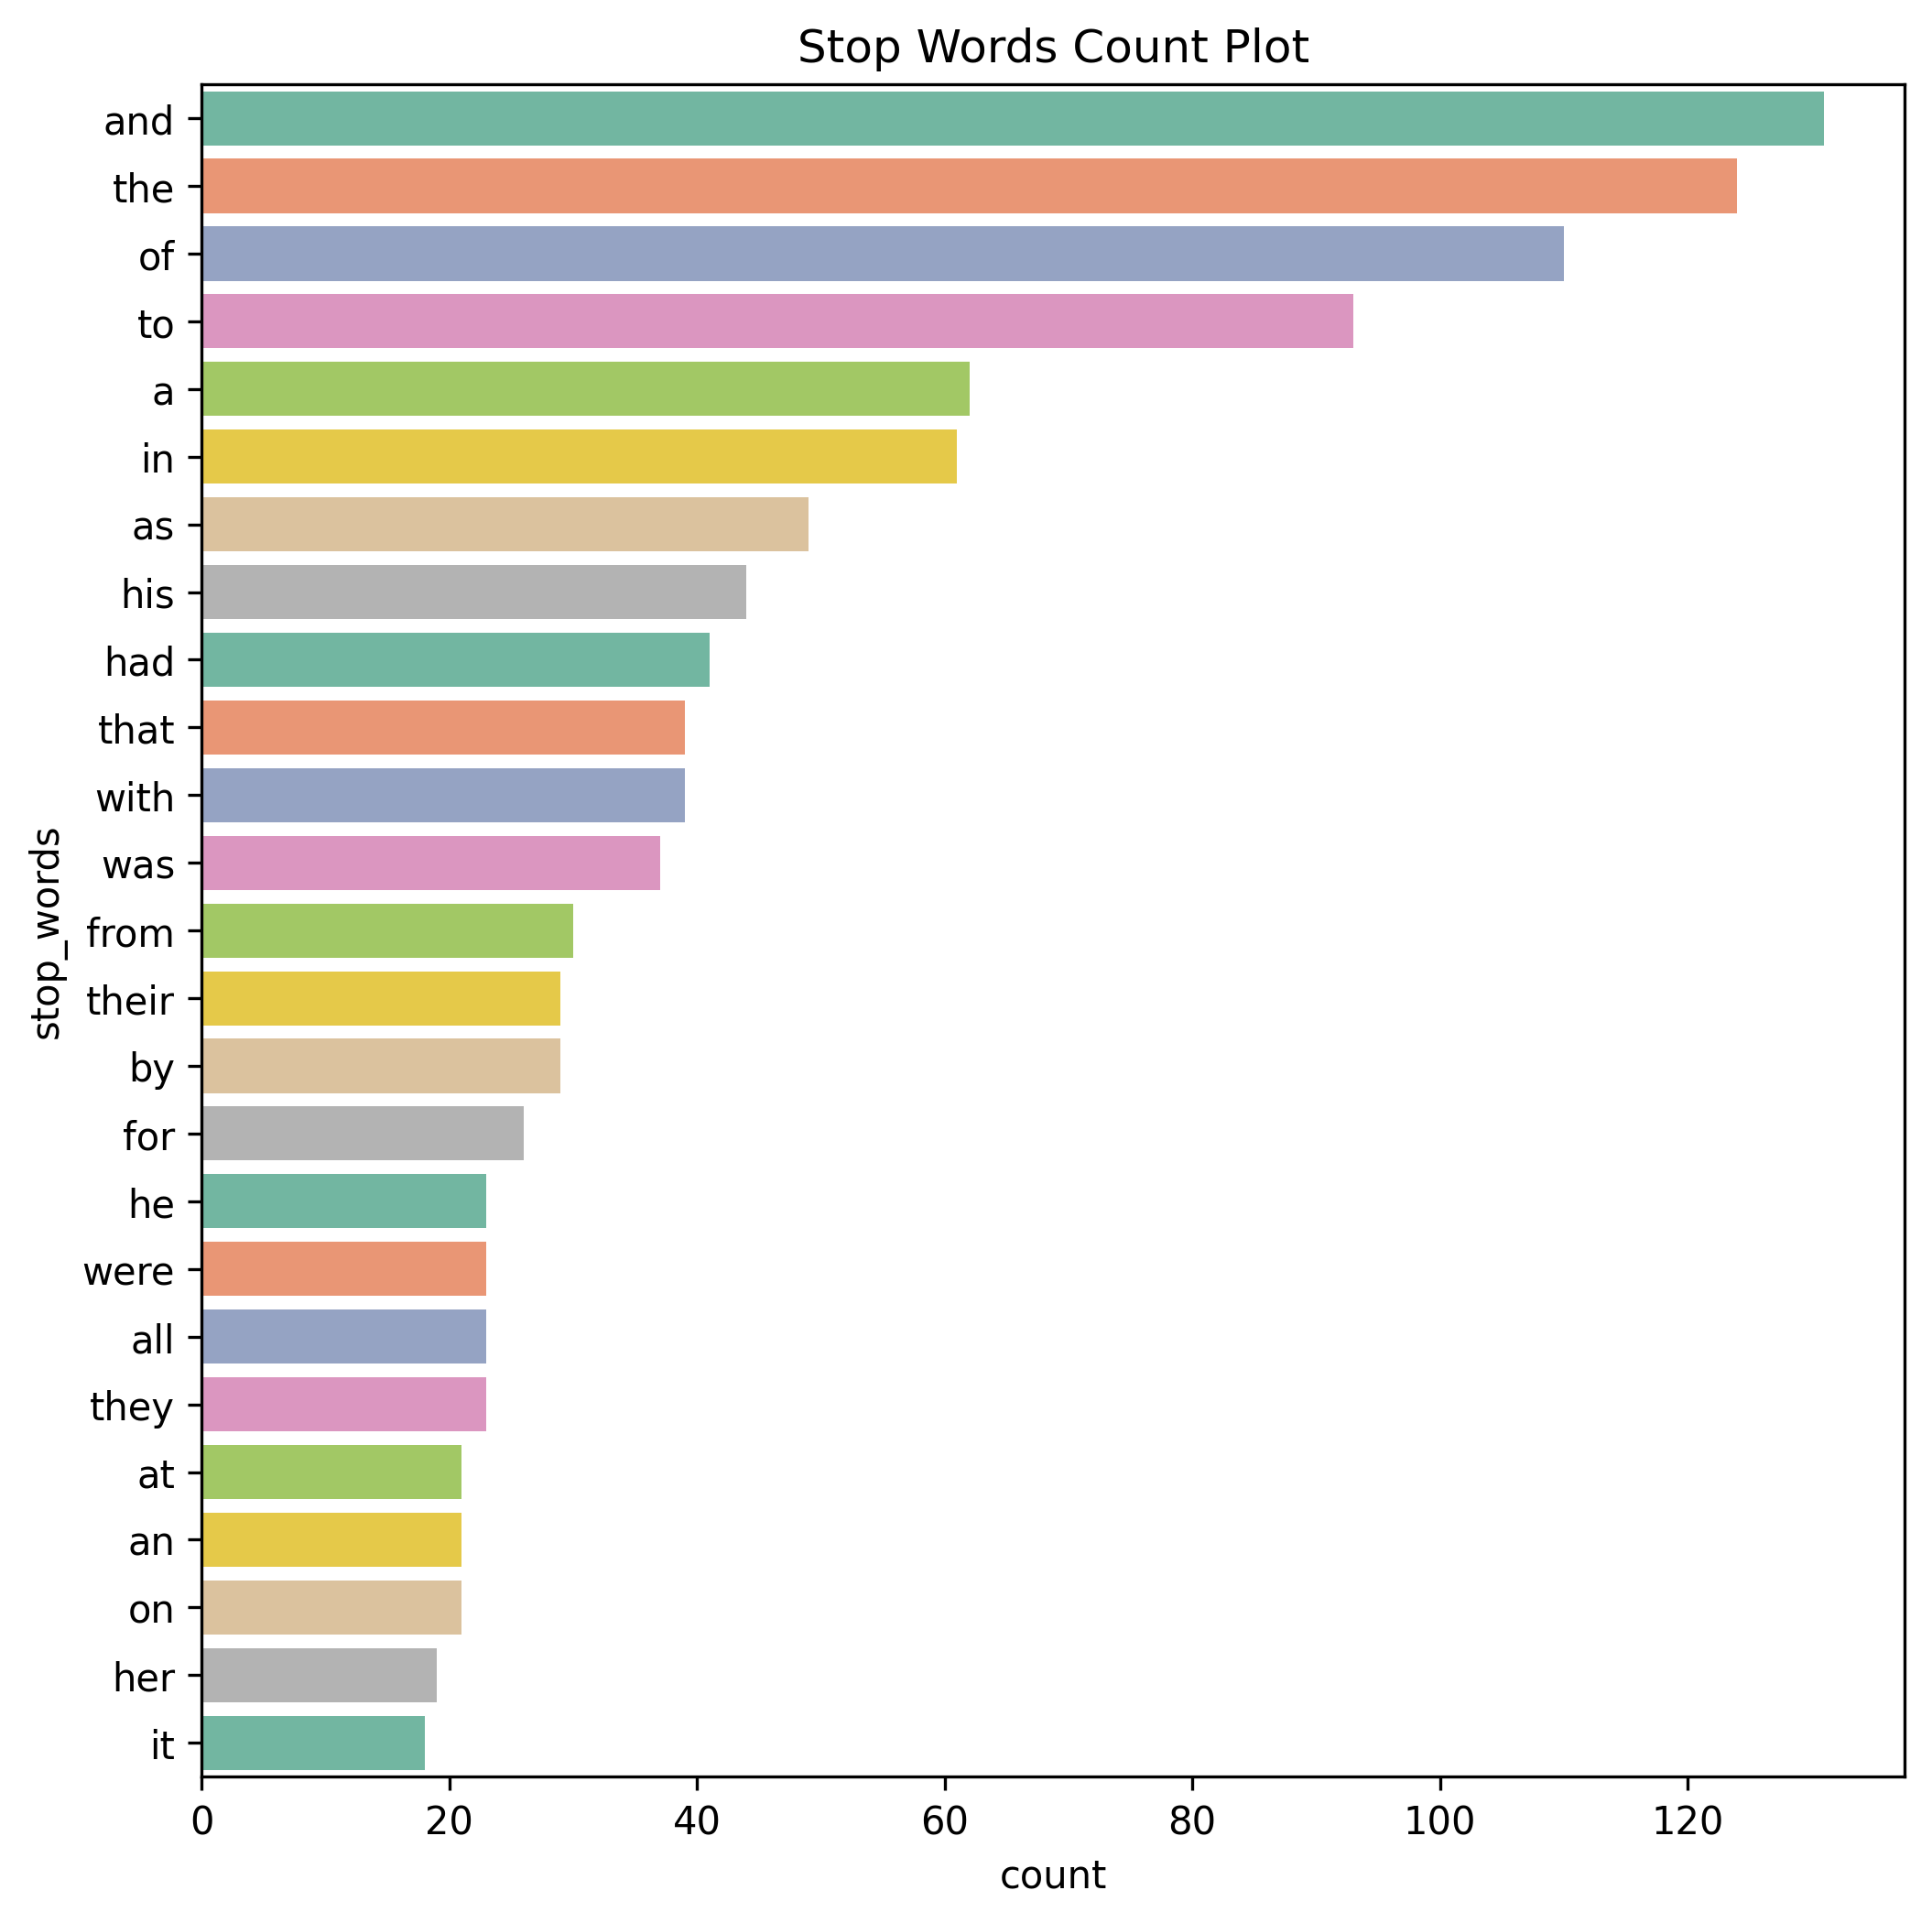

In [19]:
if len(stop_words_corpus.keys()) > 0:
    top_k = 25
    top_k_stop_words = paragraph_analysis.get_top_k_stop_words(stop_words_corpus, top_k=top_k)
    paragraph_analysis.plot_top_k_stop_words(
        top_k_stop_words, figsize=(8, 8), dpi=300, save_flag=False)

In [20]:
non_stop_words_corpus = paragraph_analysis.get_non_stop_words_corpus(language='english')
styled_print(f"Found {len(non_stop_words_corpus.keys())} unique non-stop words", header=True)

› Found 1196 unique non-stop words


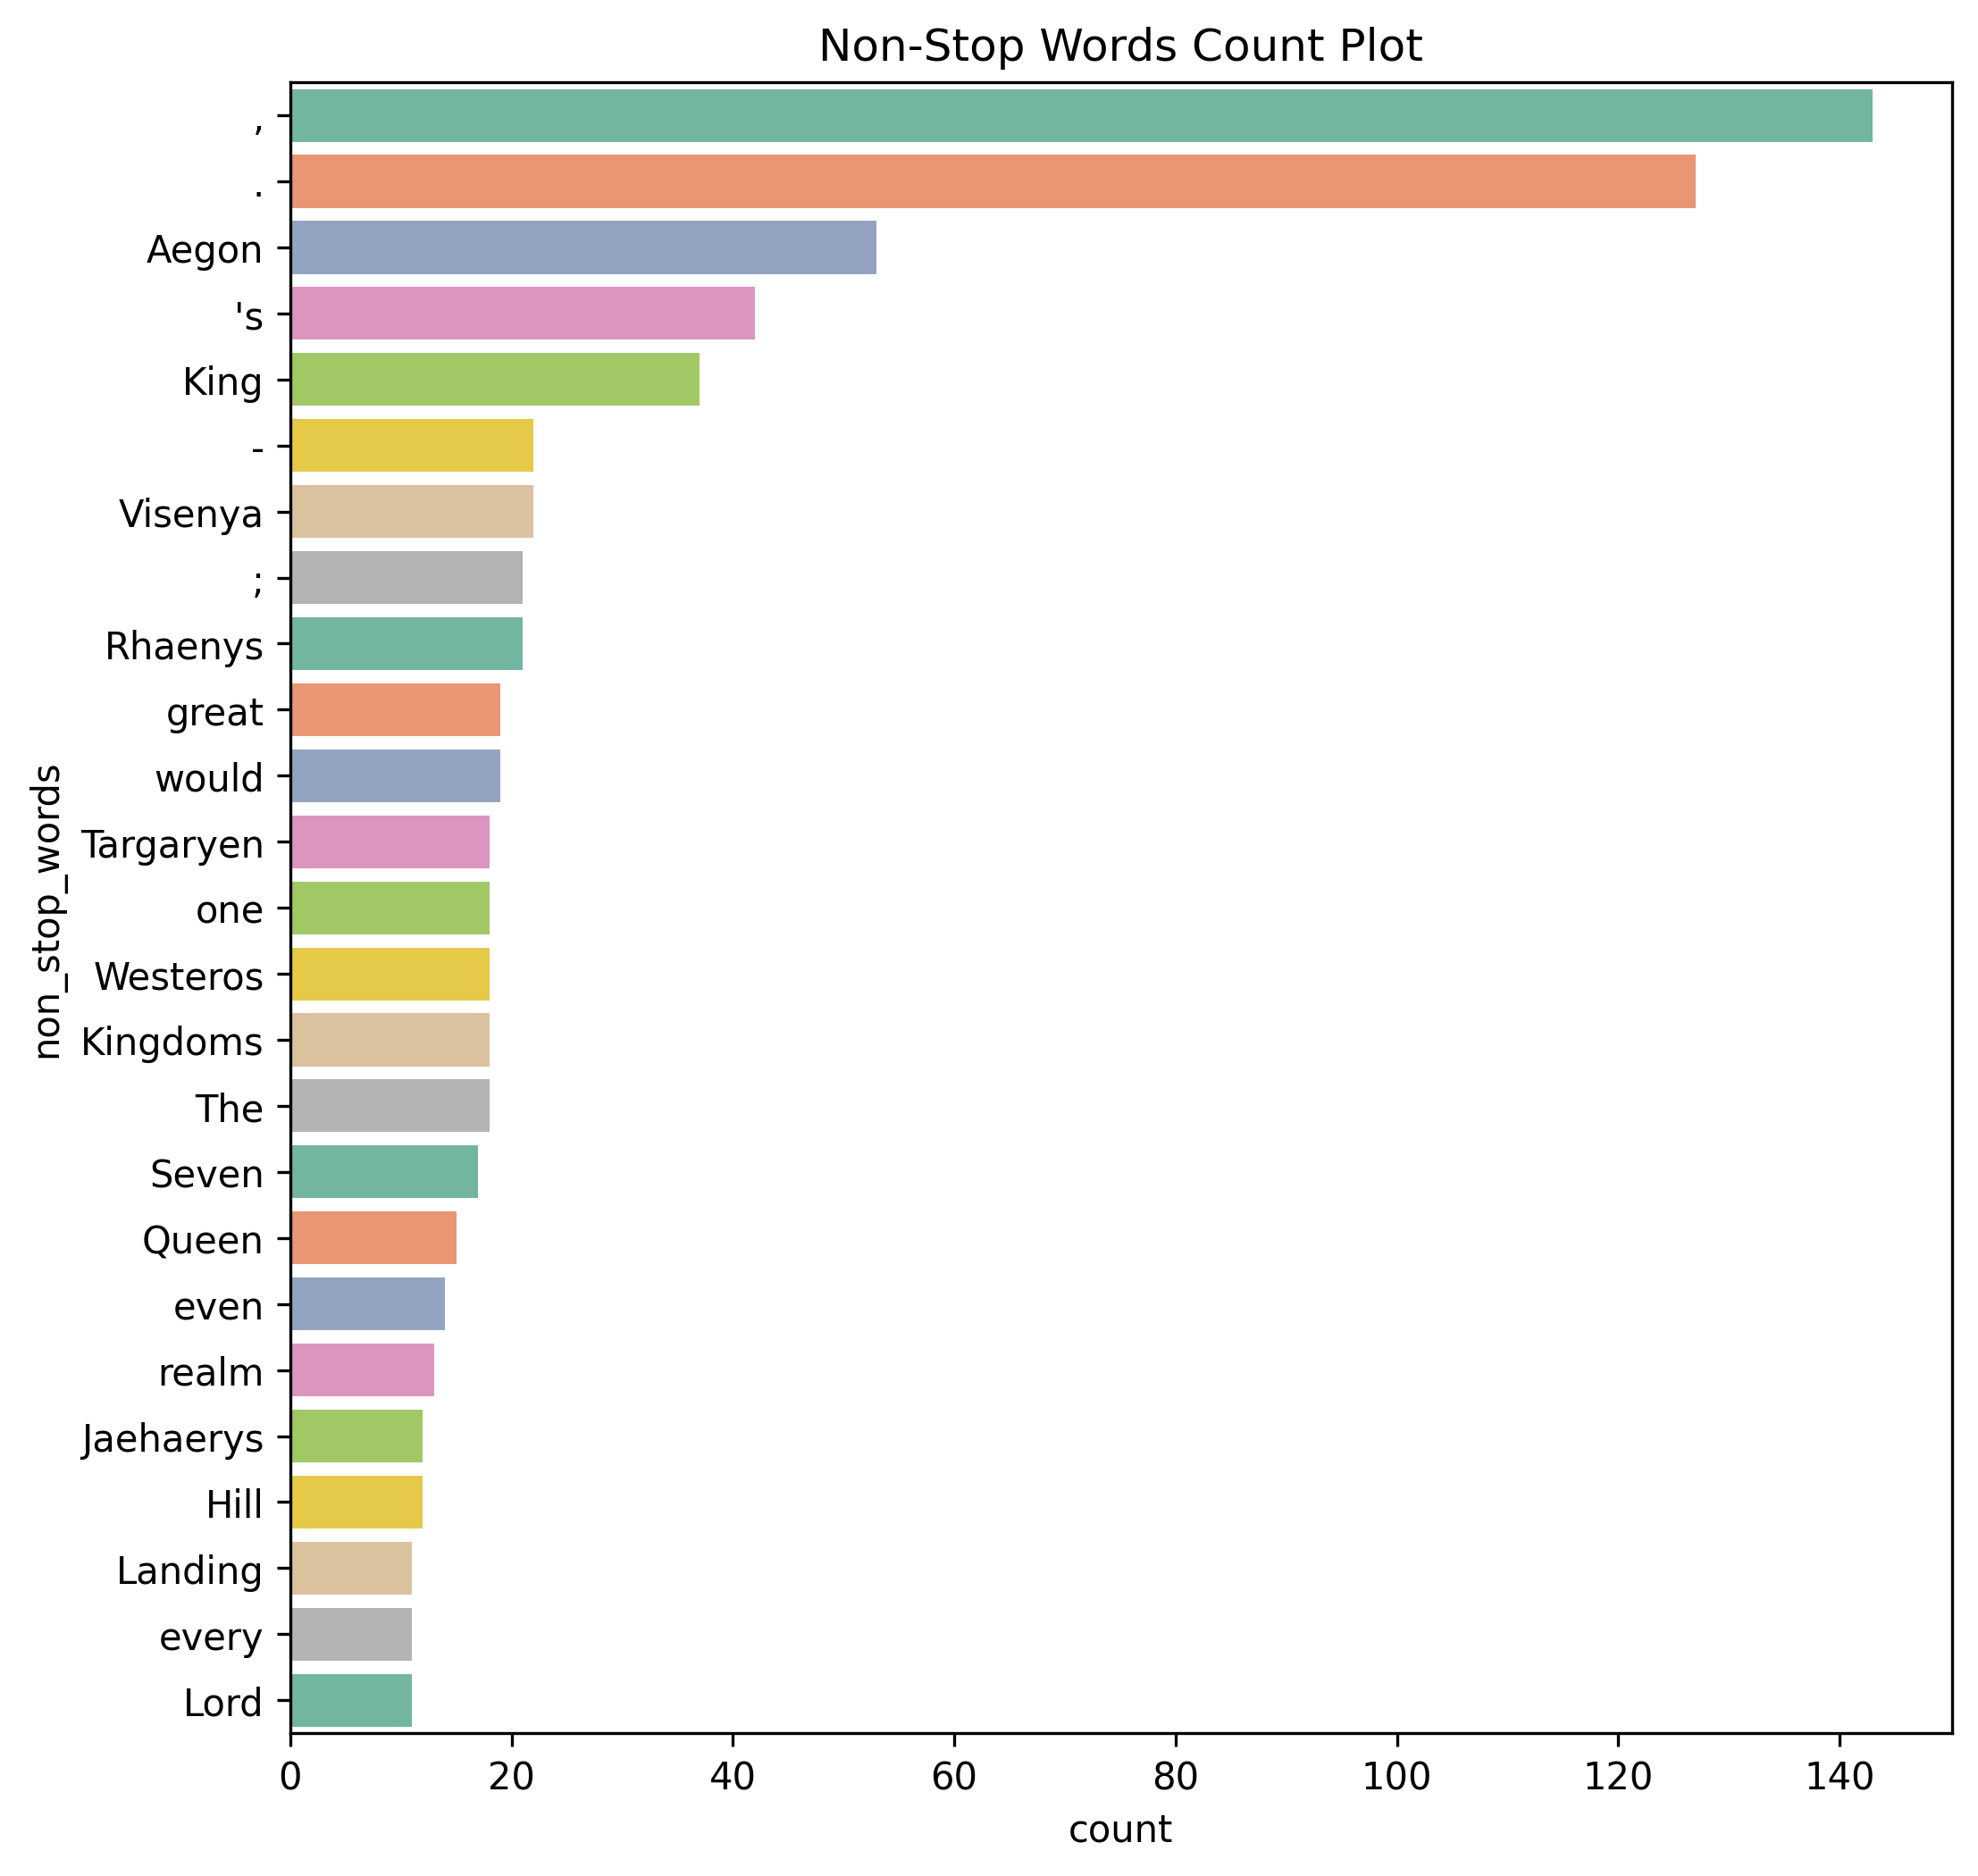

In [21]:
top_k = 25
top_k_non_stop_words = paragraph_analysis.get_top_k_non_stop_words(non_stop_words_corpus, top_k=top_k)
paragraph_analysis.plot_top_k_non_stop_words(
    top_k_non_stop_words, figsize=(8, 8), dpi=300, save_flag=False)

In [22]:
bigrams = paragraph_analysis.get_ngrams(n=2, return_list=True)
styled_print(f"Found {len(bigrams)} Bigrams", header=True)

› Found 4396 Bigrams


In [23]:
bigrams

[('Aegon', 'I'),
 ('I', 'Targaryen'),
 ('Targaryen', 'was'),
 ('was', 'one'),
 ('one', 'of'),
 ('of', 'the'),
 ('the', 'greatest'),
 ('greatest', 'Targaryens'),
 ('Targaryens', 'to'),
 ('to', 'ever'),
 ('ever', 'reign'),
 ('reign', '.'),
 ('.', 'With'),
 ('With', 'his'),
 ('his', 'fire'),
 ('fire', 'and'),
 ('and', 'steel'),
 ('steel', ','),
 (',', 'he'),
 ('he', 'forged'),
 ('forged', 'a'),
 ('a', 'renown'),
 ('renown', 'for'),
 ('for', 'himself'),
 ('himself', 'that'),
 ('that', 'extended'),
 ('extended', 'far'),
 ('far', 'beyond'),
 ('beyond', 'Westeros'),
 ('Westeros', 'and'),
 ('and', 'into'),
 ('into', 'the'),
 ('the', 'most'),
 ('most', 'distant'),
 ('distant', 'corners'),
 ('corners', 'of'),
 ('of', 'the'),
 ('the', 'world'),
 ('world', '.'),
 ('.', 'His'),
 ('His', 'loyal'),
 ('loyal', 'subjects'),
 ('subjects', 'could'),
 ('could', 'see'),
 ('see', 'him'),
 ('him', 'in'),
 ('in', 'their'),
 ('their', 'dreams'),
 ('dreams', ';'),
 (';', 'his'),
 ('his', 'enemies'),
 ('enemies'

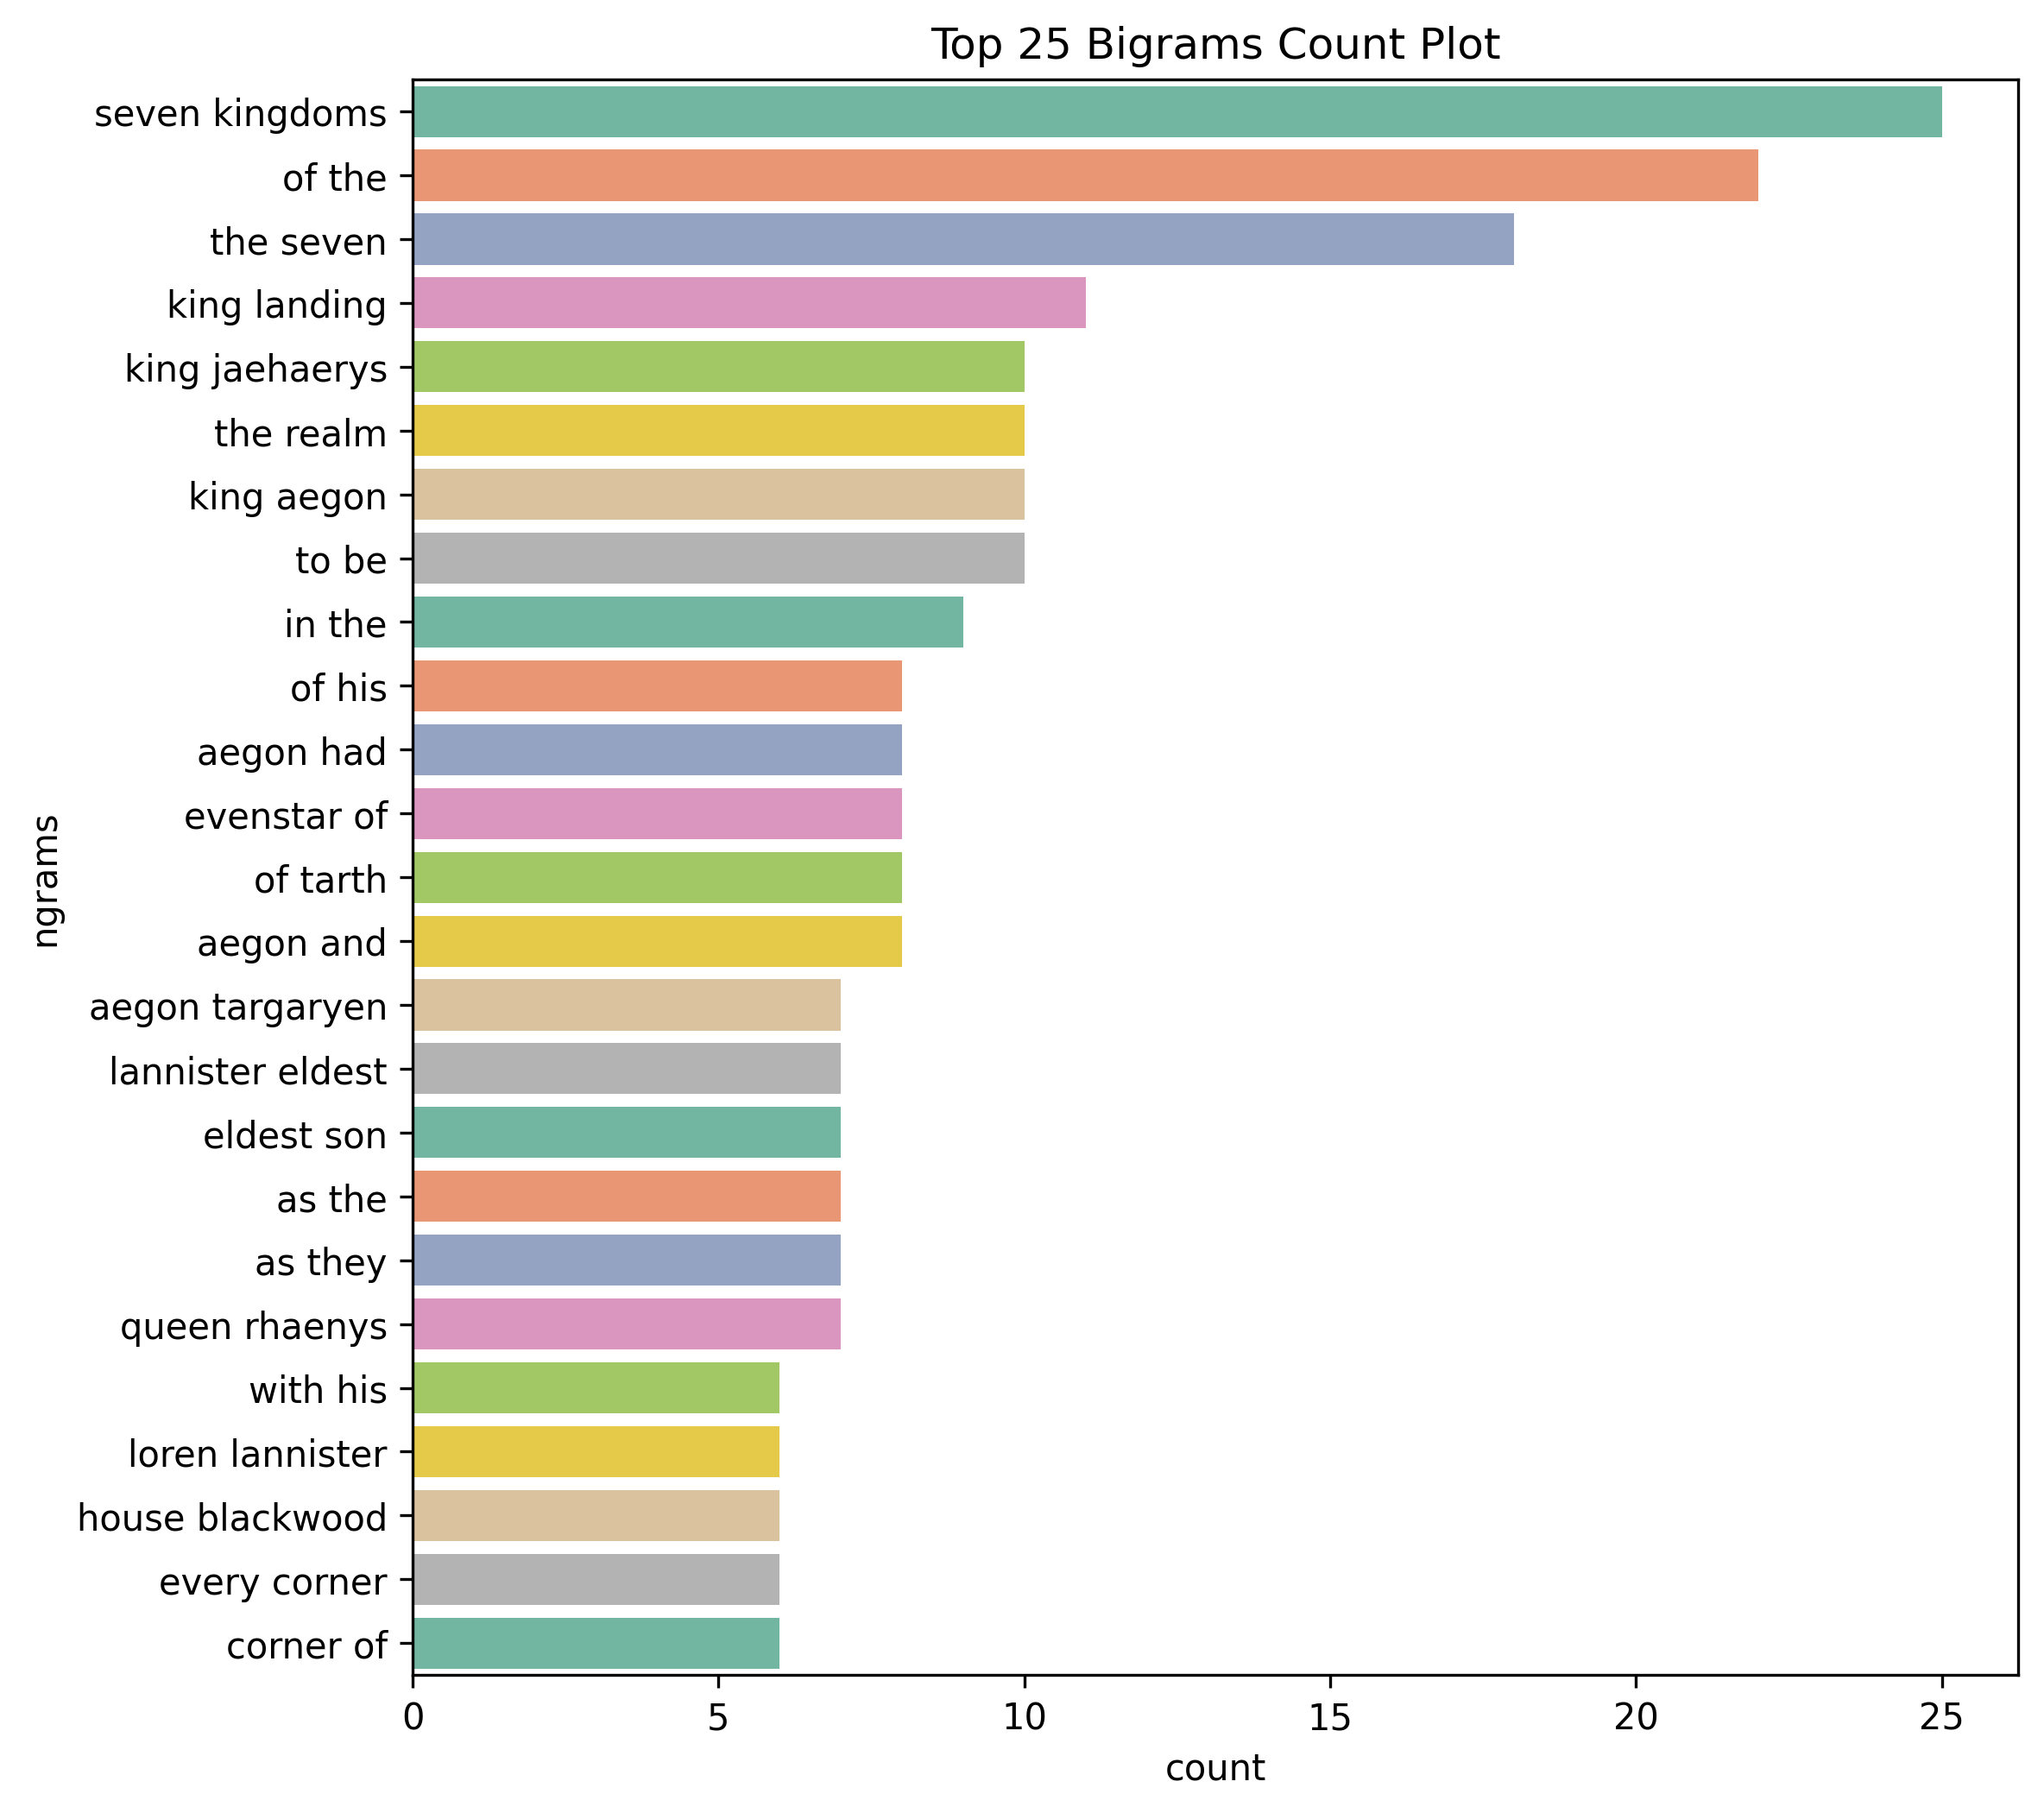

In [24]:
top_k = 25
top_k_bigrams = paragraph_analysis.get_top_k_ngrams(n=2, top_k=top_k)
paragraph_analysis.plot_top_k_ngrams(
    top_k_bigrams, title=f"Top {top_k} Bigrams Count Plot", figsize=(8, 8), dpi=300, save_flag=False)

In [25]:
trigrams = paragraph_analysis.get_ngrams(n=3, return_list=True)
styled_print(f"Found {len(trigrams)} Trigrams", header=True)

› Found 4395 Trigrams


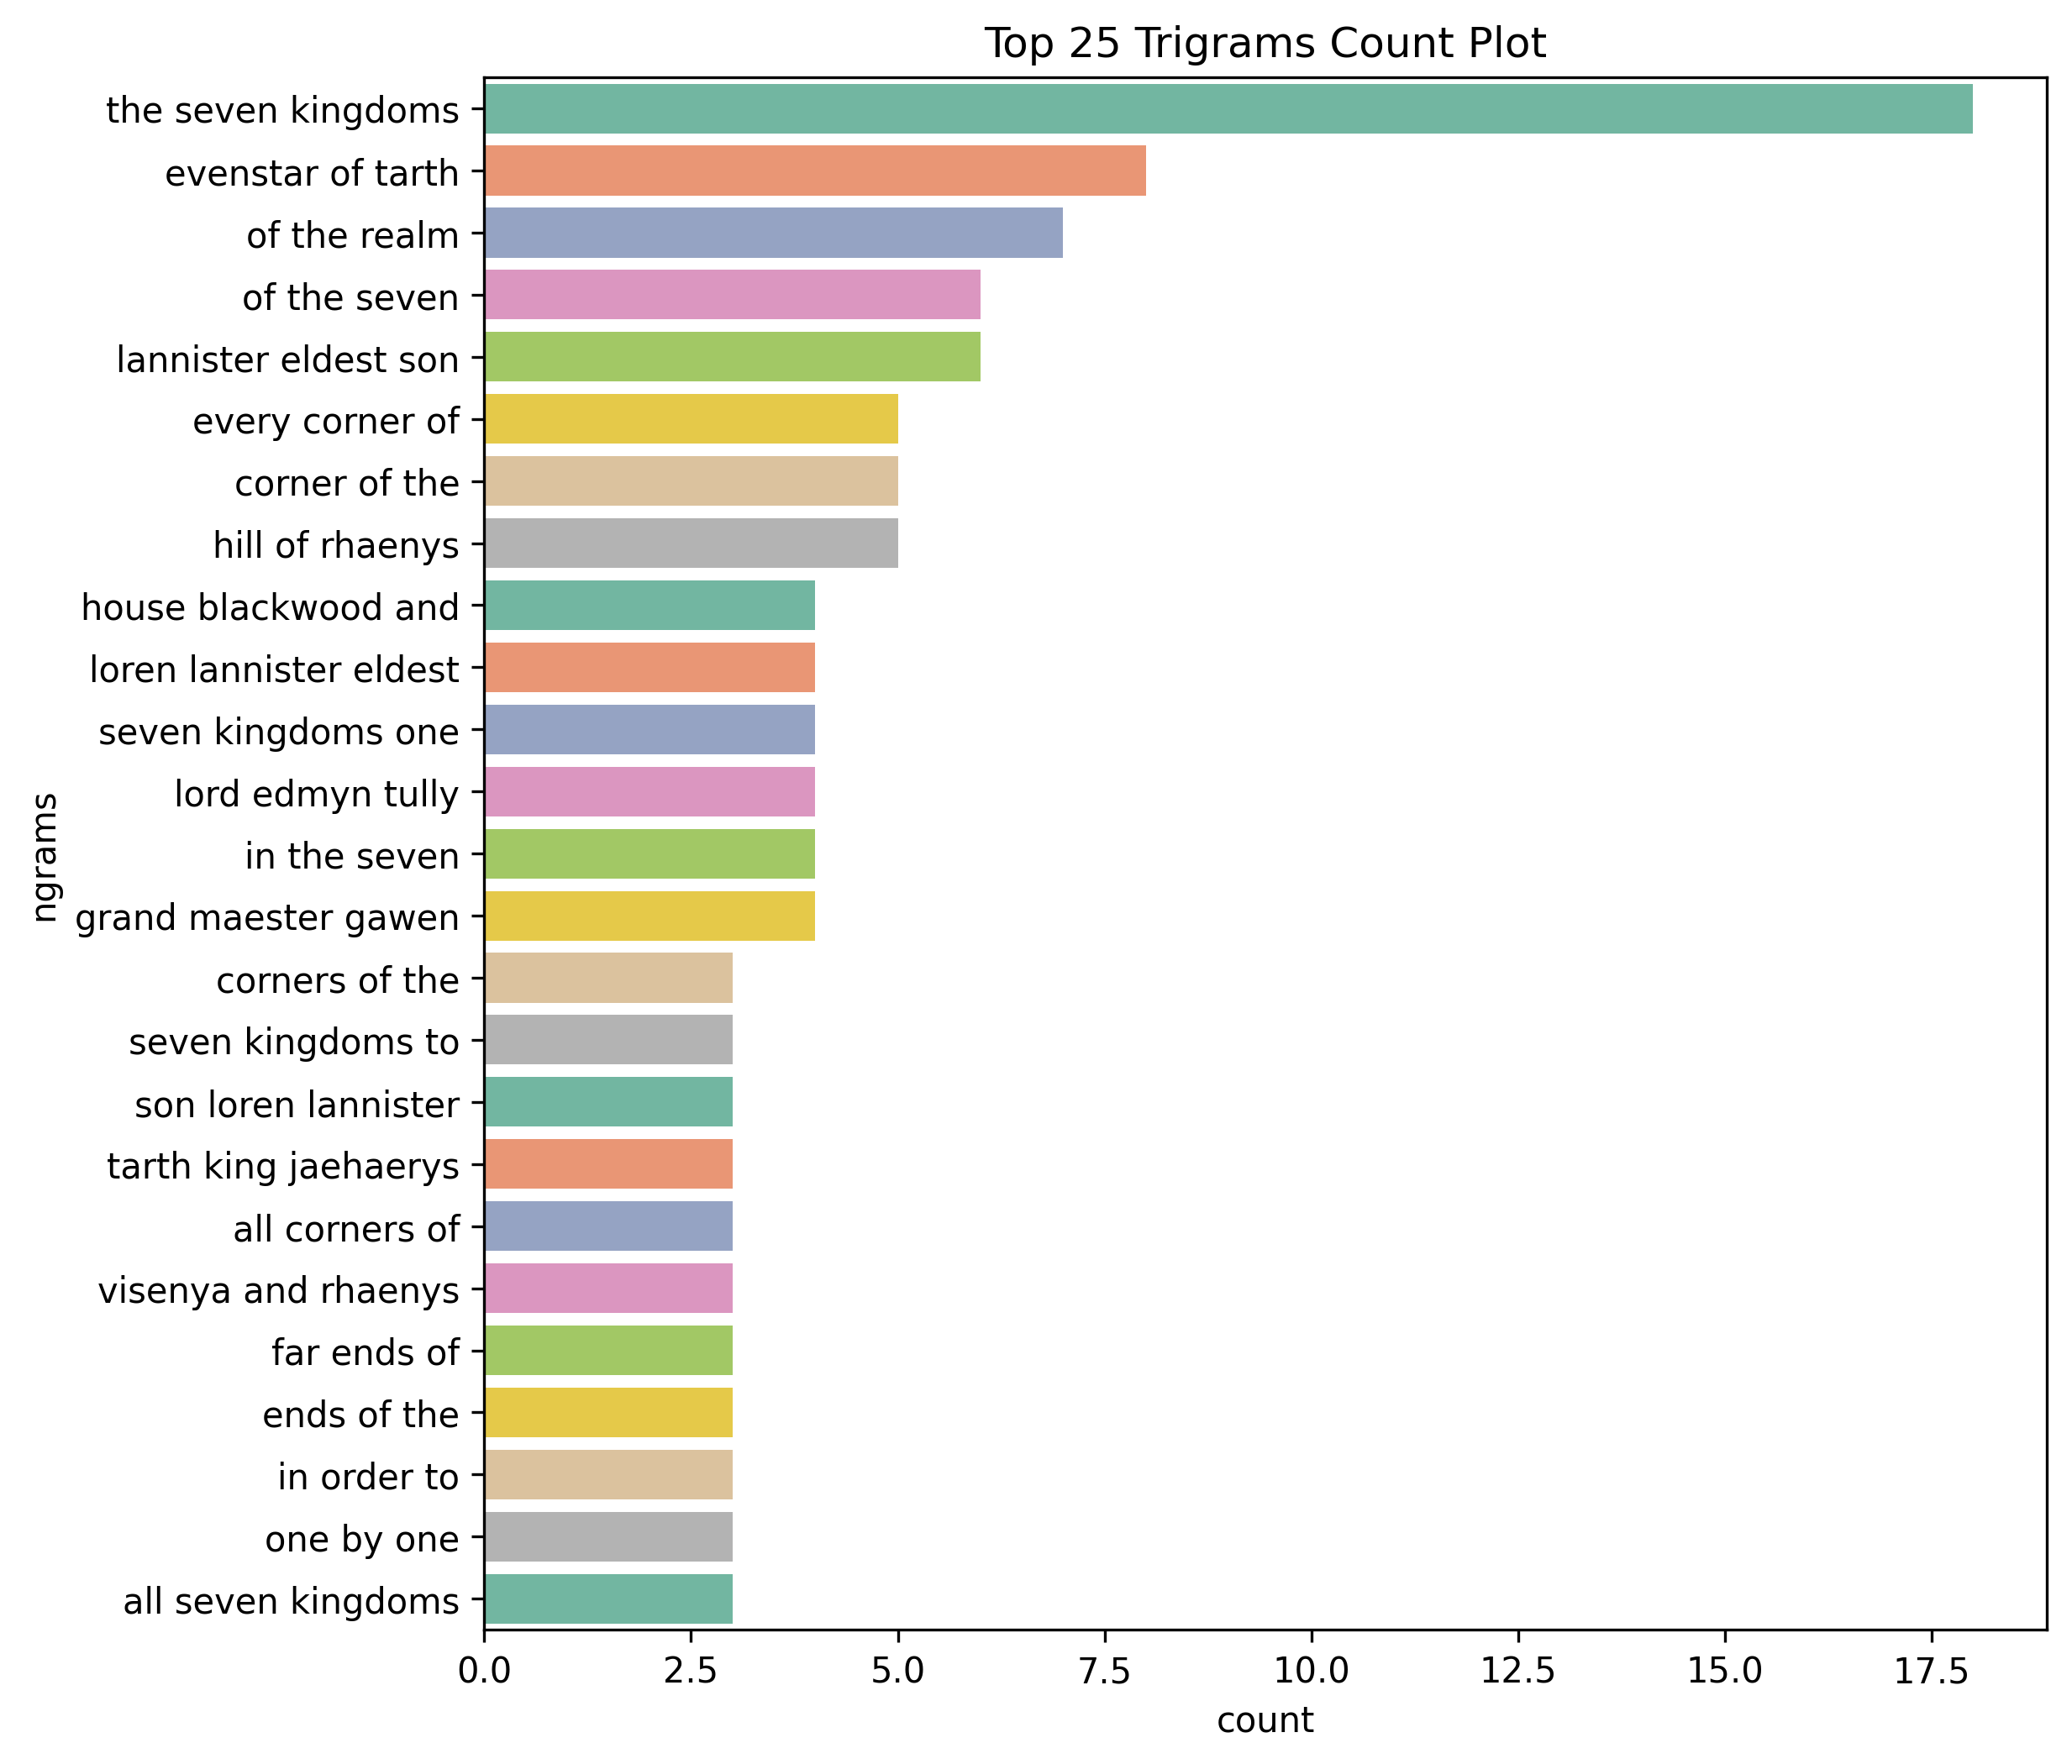

In [26]:
top_k = 25
top_k_trigrams = paragraph_analysis.get_top_k_ngrams(n=3, top_k=top_k)
paragraph_analysis.plot_top_k_ngrams(
    top_k_trigrams, 
    title=f"Top {top_k} Trigrams Count Plot", 
    figsize=(8, 8), 
    dpi=300, 
    save_flag=False
)

In [27]:
vectorizer, lda_model, lda_vectors = paragraph_analysis.build_lda(n_components=2)

In [28]:
paragraph_analysis.extract_topics(vectorizer, lda_model)

› Topic 0:
    › ('the', 142.1911266504714)
    › ('and', 135.3094205707992)
    › ('of', 110.42487722121679)
    › ('to', 94.52541436161833)
    › ('in', 68.43833112714039)
    › ('aegon', 53.406277310589246)
    › ('as', 51.22237541861258)
    › ('his', 49.16902625973645)
    › ('king', 41.439229117396195)
    › ('with', 40.10339393384912)
› Topic 1:
    › ('her', 4.584868393254814)
    › ('she', 4.1371256549915145)
    › ('queen', 3.6384633863716025)
    › ('spent', 3.4458743213954914)
    › ('on', 3.3797663507686204)
    › ('for', 3.262240088794481)
    › ('other', 2.8336686495788825)
    › ('than', 2.8117370310127914)
    › ('so', 2.7837826524294265)
    › ('more', 2.665146164846484)


{0: ['the', 'and', 'of', 'to', 'in', 'aegon', 'as', 'his', 'king', 'with'],
 1: ['her',
  'she',
  'queen',
  'spent',
  'on',
  'for',
  'other',
  'than',
  'so',
  'more']}

## Bag of Words

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

sentence_1 = "Welcome to Great Learning, Now start learning"
sentence_2 = "Learning is a good practice"


CountVec = CountVectorizer(ngram_range=(1, 1),  # to use bigrams ngram_range=(2,2)
                           stop_words='english')
#transform
Count_data = CountVec.fit_transform([sentence_1, sentence_2])

#create dataframe
cv_dataframe = pd.DataFrame(
    Count_data.toarray(), columns=CountVec.get_feature_names_out())
print(cv_dataframe)

   good  great  learning  practice  start  welcome
0     0      1         2         0      1        1
1     1      0         1         1      0        0


In [30]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

CountVec = CountVectorizer(
    ngram_range=(1, 1),
    stop_words='english'
)
#transform
Count_data = CountVec.fit_transform(corpus)

#create dataframe
cv_dataframe = pd.DataFrame(
    Count_data.toarray(), columns=CountVec.get_feature_names_out())
print(cv_dataframe)


   document  second
0         1       0
1         2       1
2         0       0
3         1       0


In [31]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]


#without smooth IDF
print("Without Smoothing:")
#define tf-idf
tf_idf_vec = TfidfVectorizer(
    use_idf=True,
    smooth_idf=False,
    ngram_range=(1, 1), 
    stop_words='english'
)

#transform
tf_idf_data = tf_idf_vec.fit_transform(corpus)

#create dataframe
tf_idf_dataframe = pd.DataFrame(
    tf_idf_data.toarray(), 
    columns=tf_idf_vec.get_feature_names_out()
)
print(tf_idf_dataframe)


Without Smoothing:
   document    second
0   1.00000  0.000000
1   0.73352  0.679668
2   0.00000  0.000000
3   1.00000  0.000000


Bleu Score